# Sample-specific mode (single sample)

### Run Splitpea on SE counts to compare a single sample versus bundled background set

Example workflow showing how to run Splitpea on a single metastatic protstate cancer cell line sample against a set of normal prostate tissue samples, leveraging the package's integration with the [IRIS data set](https://www.pnas.org/doi/10.1073/pnas.2221116120). This mode can be used to analyze samples consistent with the [2024 Splitpea paper](https://pubmed.ncbi.nlm.nih.gov/38160308/). 

In [ ]:
%%capture
# install necessary dependencies (this can take a few minutes)
%pip install splitpea

# Tabix is used under-the-hood for some of the functions and should be installed before running
# install directly via the command line or with conda
#!sudo apt-get install tabix
%conda install -y -c bioconda tabix

In [ ]:
# if all dependencies are installed begin right away
import splitpea

### Grabbing samples and the background collection

In this example, we use the rMATS-turbo example data for prostate cancer cell lines stored [here](https://zenodo.org/records/6647024). You can read more about the dataset in the [rMATS-turbo manuscript](https://pubmed.ncbi.nlm.nih.gov/38396040/).

For simplicity, we include the shell commands for downloading and extracting these necessary files below. You can also alternatively also download and extract these files yourself.

In [2]:
!wget -O PC3E-GS689.tar https://zenodo.org/records/6647024/files/PC3E-GS689.tar.gz?download=1
!tar -xvzf PC3E-GS689.tar

--2025-09-13 00:26:27--  https://zenodo.org/records/6647024/files/PC3E-GS689.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.43.25, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119609490 (114M) [application/octet-stream]
Saving to: ‘PC3E-GS689.tar’

PC3E-GS689.tar      100%[===================>] 114.07M  4.99MB/s    in 28s     

2025-09-13 00:26:56 (4.11 MB/s) - ‘PC3E-GS689.tar’ saved [119609490/119609490]

PC3E-GS689/
PC3E-GS689/fromGTF.novelJunction.SE.txt
PC3E-GS689/fromGTF.novelSpliceSite.A5SS.txt
PC3E-GS689/SE.MATS.JC.txt
PC3E-GS689/RI.MATS.JCEC.txt
PC3E-GS689/JCEC.raw.input.RI.txt
PC3E-GS689/fromGTF.novelSpliceSite.MXE.txt
PC3E-GS689/fromGTF.RI.txt
PC3E-GS689/JC.raw.input.RI.txt
PC3E-GS689/summary.txt
PC3E-GS689/fromGTF.novelJunction.RI.txt
PC3E-GS689/A3SS.MATS.JCEC.txt
PC3E-GS689/fromGTF.novelSpliceSite.SE.txt
PC3E-GS689/JC.raw.input.SE.txt
PC3E-GS68

Now that we have our prostate cancer cell line data we will extract a single sample from the rMATS file by setting `single_rMATS_compare` to True. This differential rMATS file contains two samples, and the cell line information is stored in the second sample, so we set the `inclevel` parameter equal to 2 to grab the second column. If the rMATS data was run per sample we would leave the `inclevel` variable to its default of 1.

In [ ]:
splitpea.preprocess_pooled(
    compare_path="PC3E-GS689/SE.MATS.JCEC.txt",
    background="prostate",
    background_download_root="IRIS_prostate/",
    out_psi_dir="GS689_PSI",
    single_rMATS_compare= True,
    inclevel = 2
)

processing file: splicing_matrix.SE.cov10.GTEx_Prostate.txt
Starting delta PSI calculation...
Processing sample SE.MATS.JCEC...


'GS689_PSI'

### Build the rewired network

Now that we have preprocessed our files we can go ahead and run Splitpea on our metastatic prostate cancer cell line data. 

In [ ]:
GS689_net = splitpea.run("GS689_PSI/SE.MATS.JCEC-psi.txt", "GS689_prostate_net", verbose = True)

09-13-2025 04:54:49 PM:INFO:Loading DDIs....
09-13-2025 04:54:49 PM:INFO:# pfams: 8602, # ddis: 17450
09-13-2025 04:54:49 PM:INFO:Loading PPIs....
09-13-2025 04:54:51 PM:INFO:# proteins: 20286, # interactions: 793078
09-13-2025 04:54:51 PM:INFO:Loading gene-protein domain info....
09-13-2025 04:54:51 PM:INFO:Reading differential exon results....
09-13-2025 04:54:51 PM:INFO:Reading in input exons...
09-13-2025 04:54:51 PM:INFO:# of differentially expressed exons: 959
09-13-2025 04:54:51 PM:INFO:Calculating network....
09-13-2025 04:55:28 PM:INFO:# nodes: 1060, # edges: 1182
09-13-2025 04:55:28 PM:INFO:Outputting as pickle...
09-13-2025 04:55:28 PM:INFO:Done


### Exploring the rewired network

We can visualize the network and calculate basic stats. The other example notebooks have alternative downstream workflows that may also be useful, such as performing gene set enrichment (`condition_mode.ipynb`), or comparing with multiple networks (`sample_mode_multi.ipynb`).

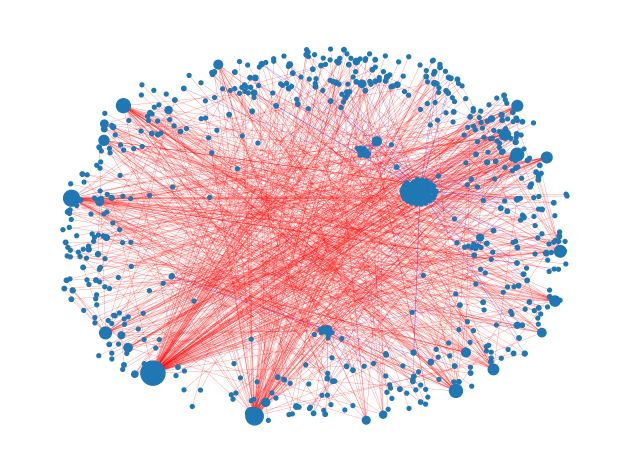

No output files were requested.


In [5]:
# view the network without saving to file
splitpea.plot(GS689_net, plot_matplot=True, self_edges=False, lcc=True)

In [6]:
# find the genes most impacted by splicing changes in the prostate cancer cell line
splitpea.stats(GS689_net)

    Basic edge stats:
    Gain : 159
    Loss : 947
    Chaos: 4
    


,node,symbol,degree,normalized_degree,gain_count,loss_count,chaos_count
0,1432,MAPK14,115,0.982906,0,115,0
1,5562,PRKAA1,85,0.977011,84,0,1
2,10096,ACTR3,59,1.000000,0,59,0
3,10450,PPIE,49,1.000000,0,49,0
4,3718,JAK3,37,0.948718,0,37,0
...,...,...,...,...,...,...,...
1055,5033,P4HA1,0,0.000000,0,0,0
1056,3292,HSD17B1,0,0.000000,0,0,0
1057,11045,UPK1A,0,0.000000,0,0,0
1058,196051,PLPP4,0,0.000000,0,0,0
